In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# np.set_printoptions(precision=3, floatmode='fixed')

In [3]:
rng = np.random.RandomState(0)

n_samples, n_features = 50, 200
freqs = np.arange(n_features)
t1, t2, t3 = n_features // 4, 2* n_features // 4, 3* n_features // 4
T = 8*np.random.random((n_samples,3))
print(t1, t2, t3)

25 50 75


In [4]:
X = np.zeros((n_samples, n_features))

for i in range(n_features):
    X[:, i] += T[:,0]*np.exp( -abs((freqs[i] - t1)**2 / 40))
    X[:, i] += T[:,1]*np.exp( -abs((freqs[i] - t2)**2 / 80))
    X[:, i] += T[:,2]*np.exp( -abs((freqs[i] - t3)**2 / 100))

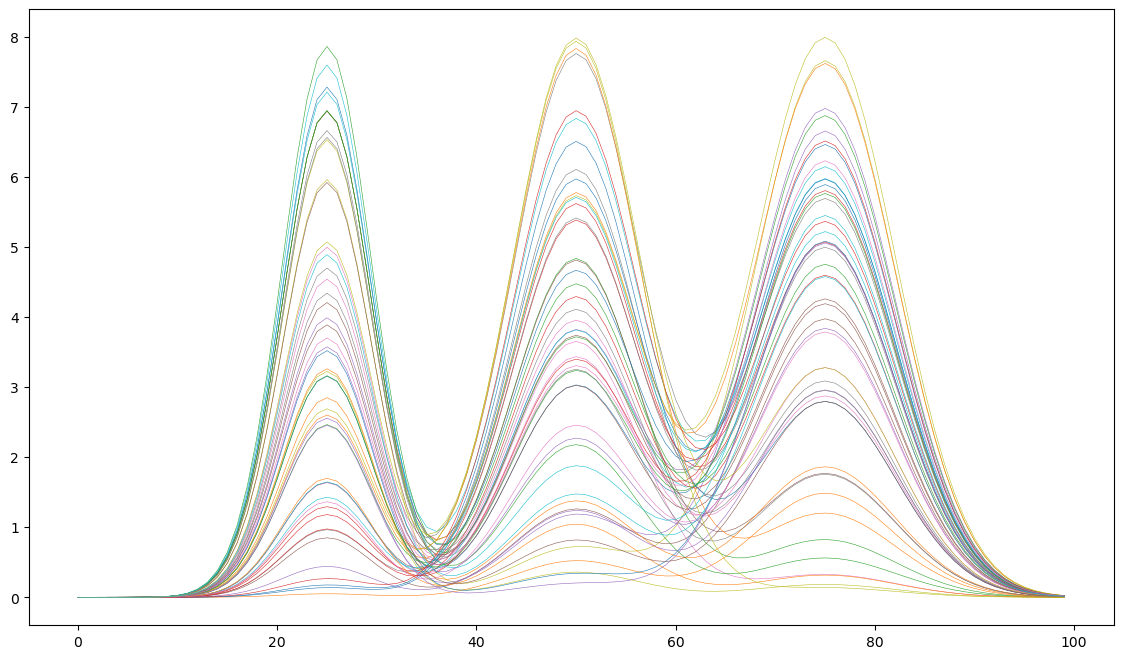

In [6]:
plt.figure(figsize=(14,8))
for k in range(n_samples):
    plt.plot(X[k], linewidth=0.4)
plt.show()

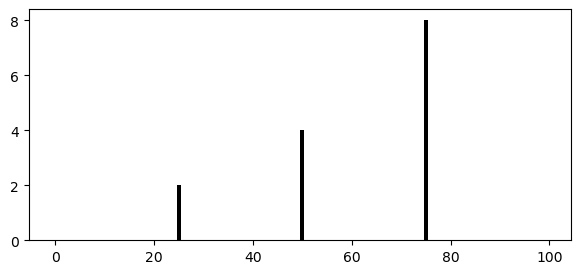

In [10]:
true_coef = np.zeros(n_features, 'd')
true_coef[t1] = 2  # информативные только первые десять коэффициентов
true_coef[t2] = 4  # информативные только первые десять коэффициентов
true_coef[t3] = 8  # информативные только первые десять коэффициентов

plt.figure(figsize=(7,3))
plt.bar(range(n_features), true_coef, color='k')
plt.show()

Y0 = np.dot(X, true_coef)

In [11]:
Y = Y0 + 5.0 * rng.normal(0, 1, n_samples)

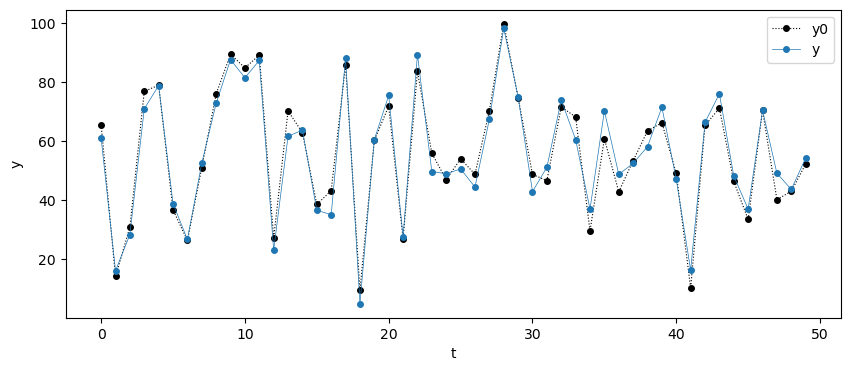

In [12]:
plt.figure(figsize=(10,4))
plt.plot(Y0, marker='o', markersize=4, color='k', linewidth=0.8, linestyle=':', label='y0')
plt.plot(Y, marker='o', markersize=4, linewidth=0.5, label='y')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import Lasso, lars_path
from sklearn.metrics import r2_score

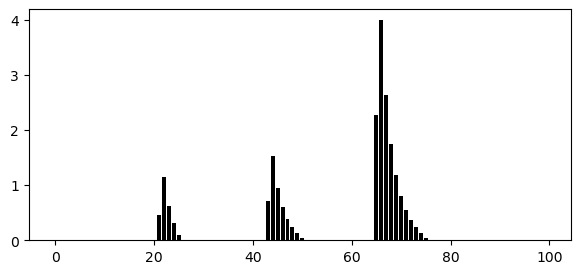

Lasso r^2: 0.960


In [34]:
lasso = Lasso(alpha=0.02, tol=0.001)
lasso.fit(X, Y)

plt.figure(figsize=(7,3))
plt.bar(range(n_features), lasso.coef_, color='k')
plt.show()

Y_p = lasso.predict(X)
r2 = r2_score(Y, Y_p)
print(f"Lasso r^2: {r2:.3f}")

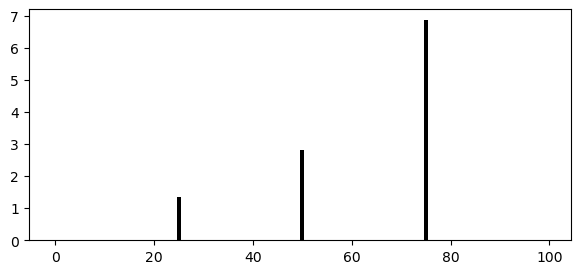

Lasso r^2: 0.930


In [39]:
lasso2 = Lasso(alpha=5.0, tol=0.001, fit_intercept=True)
lasso2.fit(X, Y)

plt.figure(figsize=(7,3))
plt.bar(range(n_features), lasso2.coef_, color='k')
plt.show()

Y2_p = lasso2.predict(X)
r2 = r2_score(Y, Y2_p)
print(f"Lasso r^2: {r2:.3f}")

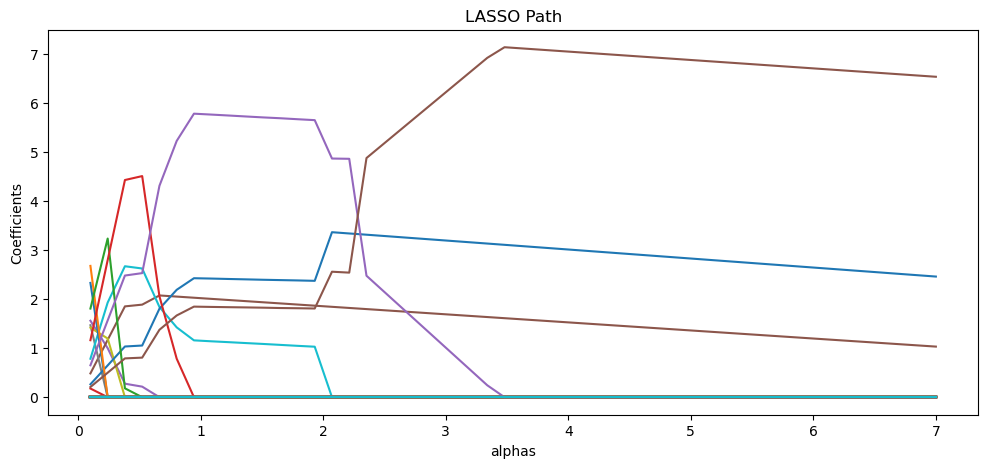

In [41]:
coef_path = []
alphas = np.linspace(0.1, 7., 50)
for alpha in alphas:
    lasso = Lasso(alpha=alpha, tol=0.001)
    lasso.fit(X, Y)
    coef_path.append(lasso.coef_)

coef_path = np.c_[tuple(coef_path)]

plt.figure(figsize=(12,5))
for j in range(n_features):
    plt.plot(alphas, coef_path[j,:])
plt.xlabel("alphas")
plt.ylabel("Coefficients")
plt.title("LASSO Path")

plt.show()

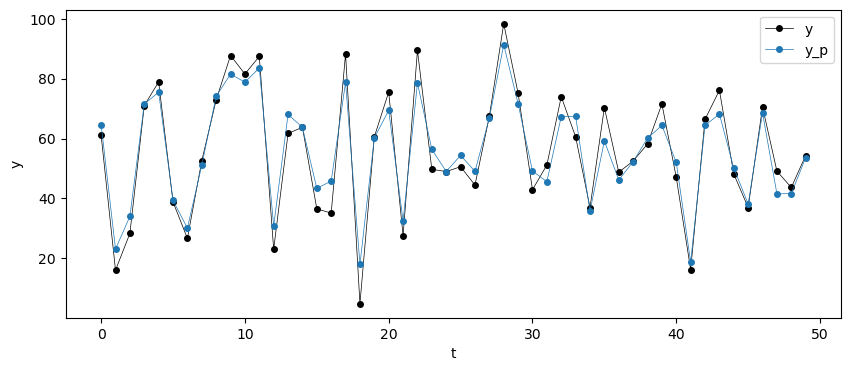

In [42]:
plt.figure(figsize=(10,4))
plt.plot(Y, marker='o', markersize=4, color='k', linewidth=0.5, label='y')
plt.plot(Y2_p, marker='o', markersize=4, linewidth=0.5, label='y_p')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()